In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("faang_stock_prices.csv")

In [3]:
df.head()

,Date,Ticker,Open,High,Low,Close,Volume,SMA_7,SMA_21,EMA_12,EMA_26,RSI_14,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower,Daily_Return,Volatility_7d,Next_Day_Close
0,2016-02-23,AAPL,21.853144,21.875812,21.433763,21.465500,127770400,21.782546,21.682435,21.720115,21.827292,52.112369,-0.107176,-0.149939,22.401531,20.889519,-0.022605,0.018130,21.785145
1,2016-02-23,AMZN,27.777500,27.845501,27.266500,27.646999,81016000,26.675857,27.140333,26.765295,27.363824,50.230010,-0.598529,-0.896261,31.103668,22.908382,-0.011725,0.022486,27.702000
2,2016-02-23,GOOGL,36.032746,36.270944,35.515157,35.595547,41332000,35.747473,36.132564,35.810892,36.019909,28.846871,-0.209017,-0.219158,38.439218,33.798573,-0.016131,0.015153,35.774696
3,2016-02-23,META,106.108789,106.724491,104.390794,104.728432,25319300,103.488525,103.976073,103.607174,102.390311,34.031434,1.216863,1.318966,115.829165,92.886882,-0.015864,0.019720,106.138588
4,2016-02-23,MSFT,46.158514,46.184970,44.959133,45.135513,28895300,45.542440,45.303900,45.301104,45.262960,42.877882,0.038144,-0.096534,48.143898,42.459504,-0.027920,0.019161,45.294239


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 14964 entries, 0 to 14963
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             14964 non-null  str    
 1   Ticker           14964 non-null  str    
 2   Open             14964 non-null  float64
 3   High             14964 non-null  float64
 4   Low              14964 non-null  float64
 5   Close            14964 non-null  float64
 6   Volume           14964 non-null  int64  
 7   SMA_7            14964 non-null  float64
 8   SMA_21           14964 non-null  float64
 9   EMA_12           14964 non-null  float64
 10  EMA_26           14964 non-null  float64
 11  RSI_14           14964 non-null  float64
 12  MACD             14964 non-null  float64
 13  MACD_Signal      14964 non-null  float64
 14  Bollinger_Upper  14964 non-null  float64
 15  Bollinger_Lower  14964 non-null  float64
 16  Daily_Return     14964 non-null  float64
 17  Volatility_7d    14964 

In [5]:
df.shape

(14964, 19)

In [6]:
df.dtypes

Date                   str
Ticker                 str
Open               float64
High               float64
Low                float64
Close              float64
Volume               int64
SMA_7              float64
SMA_21             float64
EMA_12             float64
EMA_26             float64
RSI_14             float64
MACD               float64
MACD_Signal        float64
Bollinger_Upper    float64
Bollinger_Lower    float64
Daily_Return       float64
Volatility_7d      float64
Next_Day_Close     float64
dtype: object

In [7]:
df.describe()

,Open,High,Low,Close,Volume,SMA_7,SMA_21,EMA_12,EMA_26,RSI_14,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower,Daily_Return,Volatility_7d,Next_Day_Close
count,14964.000000,14964.000000,14964.000000,14964.000000,1.496400e+04,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000
mean,147.969959,149.643762,146.256716,147.999839,1.186247e+08,147.631588,146.746646,147.314335,146.428158,55.686976,0.886176,0.888239,156.048174,137.572513,0.001335,0.018537,148.126287
std,132.599874,134.001750,131.065146,132.547711,1.889461e+08,132.261571,131.557653,131.956650,131.170115,16.597436,4.177106,3.932864,139.825874,123.751294,0.022069,0.012431,132.632577
min,0.762756,0.777392,0.746413,0.767738,4.726100e+06,0.710800,0.683503,0.704268,0.691066,3.180003,-33.155902,-30.727270,0.780719,0.569458,-0.263901,0.001171,0.767738
25%,50.094322,50.468777,49.669161,50.083026,2.428050e+07,49.906533,49.334041,49.600781,49.146090,43.754097,-0.331123,-0.283075,51.982837,47.077112,-0.008375,0.010449,50.149251
50%,123.841343,125.102966,122.262753,123.922924,4.432600e+07,123.301276,122.667958,123.067546,122.222704,56.381405,0.507975,0.491224,131.496224,114.337861,0.001286,0.015466,124.013718
75%,189.299623,191.429458,186.986899,189.079613,1.057329e+08,188.811102,187.325549,187.740894,186.739774,67.819077,2.160937,2.068120,199.721259,176.264492,0.011626,0.022748,189.254452
max,789.972167,795.064526,779.657506,788.823792,3.692928e+09,775.982954,762.484980,766.193137,757.613109,100.000000,29.441884,26.790650,813.954233,734.580075,0.298067,0.120255,788.823792


In [8]:
df.isnull().sum()

Date               0
Ticker             0
Open               0
High               0
Low                0
Close              0
Volume             0
SMA_7              0
SMA_21             0
EMA_12             0
EMA_26             0
RSI_14             0
MACD               0
MACD_Signal        0
Bollinger_Upper    0
Bollinger_Lower    0
Daily_Return       0
Volatility_7d      0
Next_Day_Close     0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.columns

Index(['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume', 'SMA_7',
       'SMA_21', 'EMA_12', 'EMA_26', 'RSI_14', 'MACD', 'MACD_Signal',
       'Bollinger_Upper', 'Bollinger_Lower', 'Daily_Return', 'Volatility_7d',
       'Next_Day_Close'],
      dtype='str')

In [11]:
df['Date']=pd.to_datetime(df['Date'])
df=df.sort_values('Date')

# Data Visualizations 

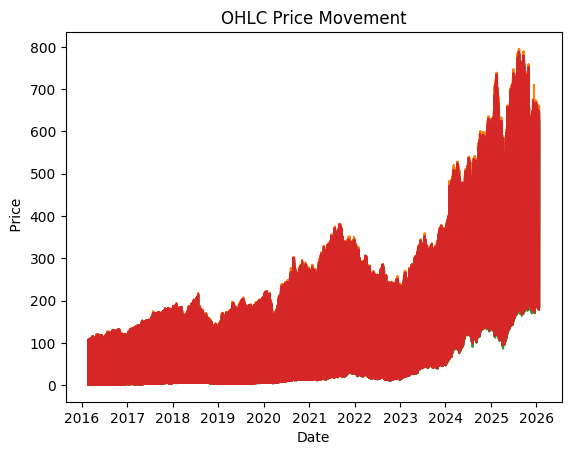

In [13]:
plt.figure()
plt.plot(df['Date'], df['Open'])
plt.plot(df['Date'], df['High'])
plt.plot(df['Date'], df['Low'])
plt.plot(df['Date'], df['Close'])
plt.title("OHLC Price Movement")
plt.xlabel("Date")
plt.ylabel(" Price")
plt.show()

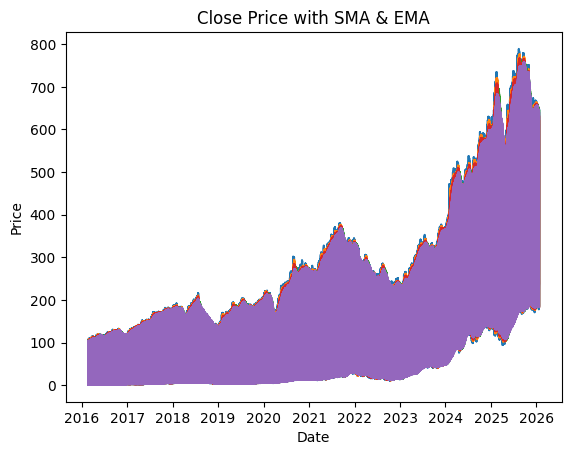

In [14]:
plt.figure()
plt.plot(df['Date'], df['Close'])
plt.plot(df['Date'], df['SMA_7'])
plt.plot(df['Date'], df['SMA_21'])
plt.plot(df['Date'], df['EMA_12'])
plt.plot(df['Date'], df['EMA_26'])
plt.title("Close Price with SMA & EMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

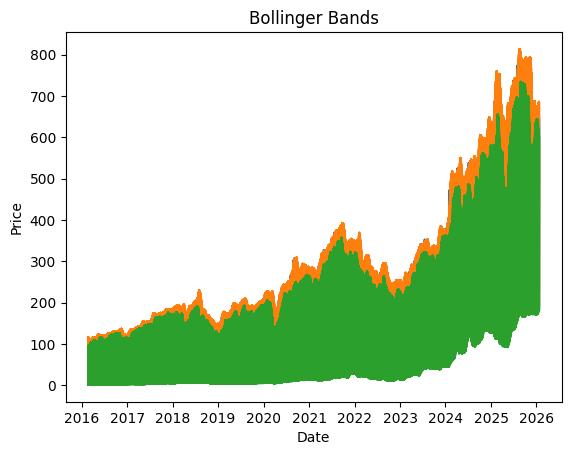

In [15]:
plt.figure()
plt.plot(df['Date'], df['Close'])
plt.plot(df['Date'], df['Bollinger_Upper'])
plt.plot(df['Date'], df['Bollinger_Lower'])
plt.title("Bollinger Bands")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

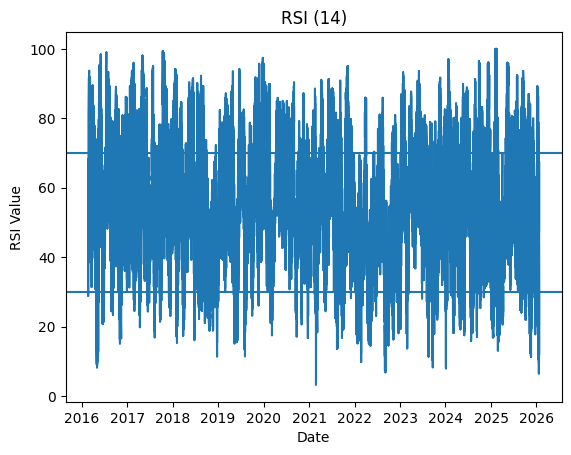

In [16]:
plt.figure()
plt.plot(df['Date'], df['RSI_14'])
plt.axhline(70)
plt.axhline(30)
plt.title("RSI (14)")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.show()

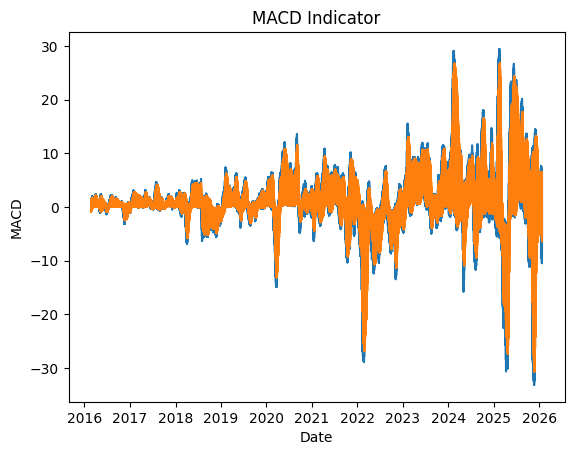

In [17]:
plt.figure()
plt.plot(df['Date'], df['MACD'])
plt.plot(df['Date'], df['MACD_Signal'])
plt.title("MACD Indicator")
plt.xlabel("Date")
plt.ylabel("MACD")
plt.show()

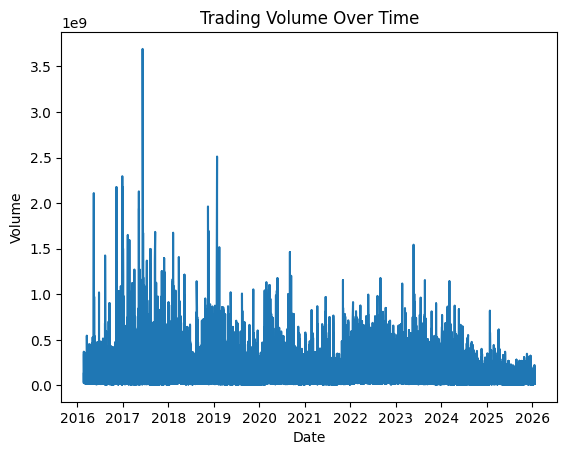

In [18]:
plt.figure()
plt.plot(df['Date'], df['Volume'])
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

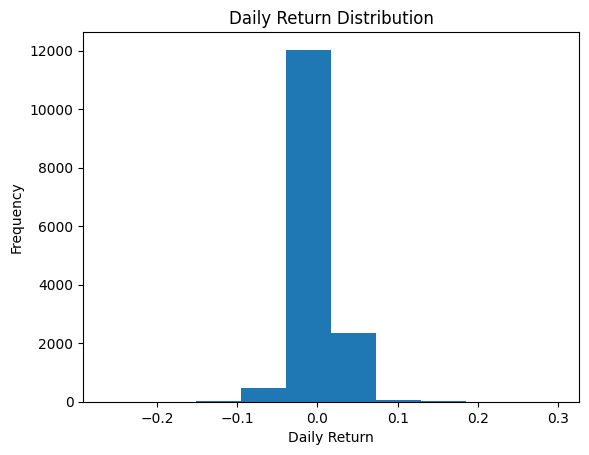

In [19]:
plt.figure()
plt.hist(df['Daily_Return'].dropna())
plt.title("Daily Return Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

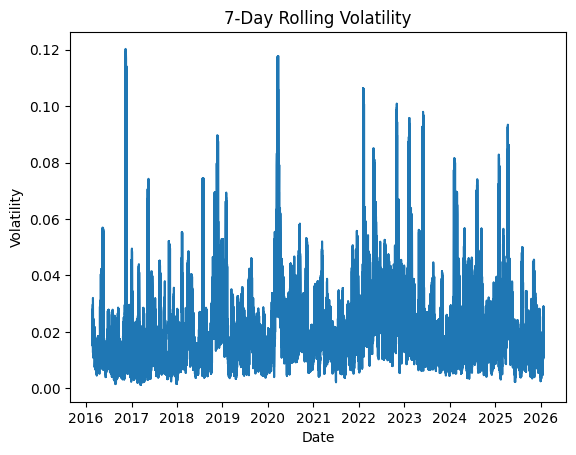

In [20]:
plt.figure()
plt.plot(df['Date'], df['Volatility_7d'])
plt.title("7-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()

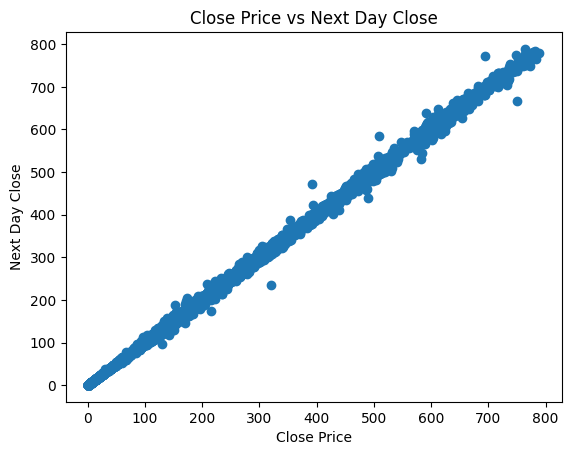

In [21]:
plt.figure()
plt.scatter(df['Close'], df['Next_Day_Close'])
plt.title("Close Price vs Next Day Close")
plt.xlabel("Close Price")
plt.ylabel("Next Day Close")
plt.show()

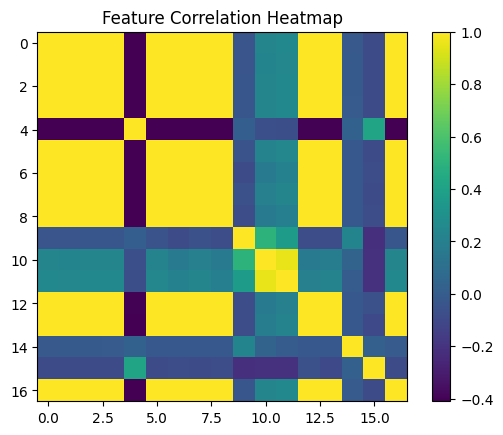

In [22]:
numeric_cols = df.select_dtypes(include='number')

plt.figure()
plt.imshow(numeric_cols.corr())
plt.title("Feature Correlation Heatmap")
plt.colorbar()
plt.show()

# Feature Engg

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [24]:
df_model = df.copy()
df_model['Date'] = pd.to_datetime(df_model['Date'])
numeric_cols = df_model.select_dtypes(include=np.number).columns.tolist()

In [27]:
X = df_model[numeric_cols].drop(columns=['Next_Day_Close'])
y = df_model['Next_Day_Close']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(50,50), max_iter=500, random_state=42)
}

In [33]:
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # fixed
    r2 = r2_score(y_test, y_pred)
    results.append([name, rmse, r2*100])  # R² in %

c:\Users\Vinay Verma\Desktop\code\Stock-Price-Forecasting\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.240e+04, tolerance: 8.944e+03
  model = cd_fast.enet_coordinate_descent(


In [34]:
results_df = pd.DataFrame(results, columns=['Model', 'RMSE', 'R2 (%)'])
results_df = results_df.sort_values(by='R2 (%)', ascending=False)
print(results_df)

                      Model        RMSE     R2 (%)
0         Linear Regression    6.768149  99.846092
1          Ridge Regression    6.771888  99.845922
8             MLP Regressor    7.039203  99.833518
2          Lasso Regression    7.822323  99.794415
4             Random Forest   94.686122  69.877345
3             Decision Tree   95.741078  69.202376
5         Gradient Boosting   96.837133  68.493190
7       K-Nearest Neighbors  106.855569  61.636793
6  Support Vector Regressor  213.766254 -53.531991


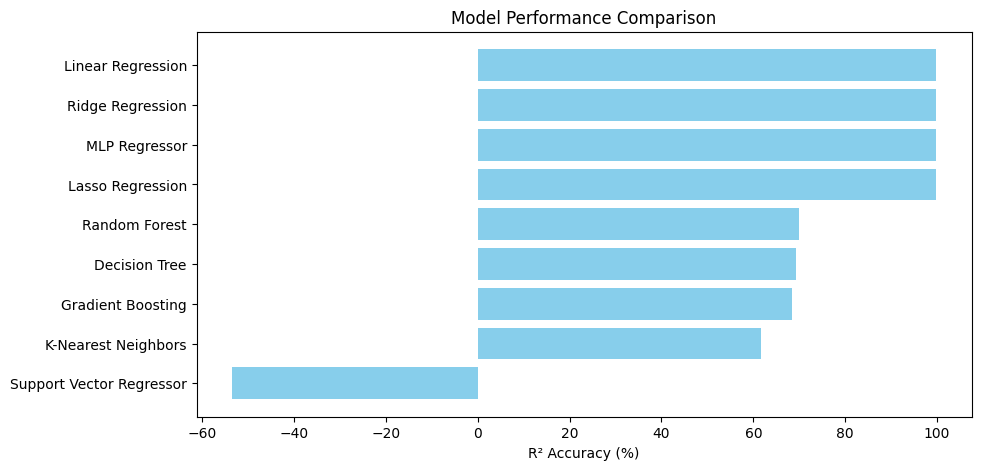

In [35]:
plt.figure(figsize=(10,5))
plt.barh(results_df['Model'], results_df['R2 (%)'], color='skyblue')
plt.xlabel("R² Accuracy (%)")
plt.title("Model Performance Comparison")
plt.gca().invert_yaxis()
plt.show()